# Linear Regression

In [181]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [182]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
# we need synthetic data

n = 100
rng = np.random.default_rng()
X = 2*rng.random((n,1)) # # input features
y = 4 + 3*X + rng.normal(0,1,(n,1)) # target

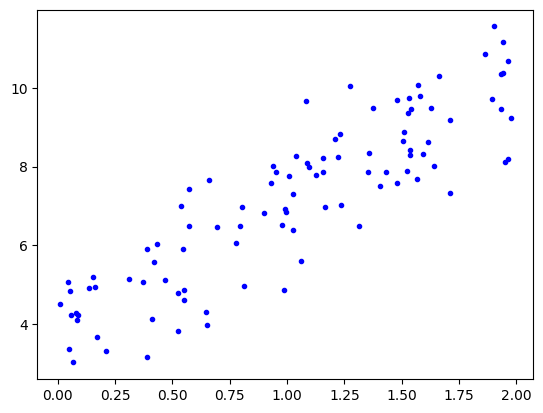

In [184]:
plt.figure()
plt.plot(X,y, "b.")
plt.show()

In [185]:
X_b = np.hstack([X, np.ones((n,1))]) # design matrix -> first example of feature engineering 
X_b

array([[0.52500902, 1.        ],
       [0.98554923, 1.        ],
       [0.80367638, 1.        ],
       [1.59273939, 1.        ],
       [1.52705164, 1.        ],
       [0.64907088, 1.        ],
       [1.51176497, 1.        ],
       [0.99316311, 1.        ],
       [1.61425965, 1.        ],
       [0.89797489, 1.        ],
       [0.55116767, 1.        ],
       [0.79588912, 1.        ],
       [0.04333419, 1.        ],
       [0.43295456, 1.        ],
       [0.54667316, 1.        ],
       [1.08606898, 1.        ],
       [0.41331452, 1.        ],
       [1.48103452, 1.        ],
       [1.21055792, 1.        ],
       [1.23099833, 1.        ],
       [0.81232276, 1.        ],
       [1.58061367, 1.        ],
       [1.94149695, 1.        ],
       [1.50415582, 1.        ],
       [1.37336341, 1.        ],
       [0.1612203 , 1.        ],
       [0.08369017, 1.        ],
       [1.71218578, 1.        ],
       [1.02414779, 1.        ],
       [1.09668031, 1.        ],
       [0.

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

In [186]:
w_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
w_best

array([[3.16042   ],
       [3.91795495]])

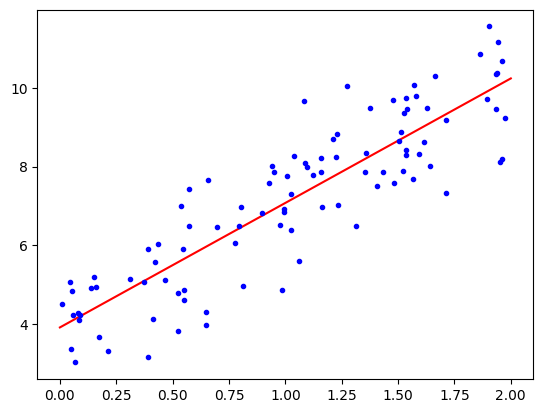

In [187]:
X_new = np.array([[0,1], [2,1]])
# use model equation

y_pred = X_new @ w_best

plt.figure() 
plt.plot(X_new[:,0], y_pred, "r-")
plt.plot(X,y, "b.")
plt.show()


# Batch Gradient Descent

# Loss Function
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

# Gradients
$$\frac{\partial}{\partial m} MSE = -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - \hat{y}_i)
$$
$$
\frac{\partial}{\partial b} MSE = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

# Gradient Descent Update Rule
$$
m := m - \alpha \cdot \frac{\partial}{\partial m} MSE
$$

$$
b := b - \alpha \cdot \frac{\partial}{\partial b} MSE
$$

In [188]:
alpha = 0.1     # lerning rate, number between 0 and 1, mostly very close to zero 
epochs = 100    # 20, 50, 100, 200, 500, 1000, 2000, ...
               # 1 epoch = the algorithm visited whole dataset 1 time 

w_bgd = rng.random((2,1))

for epoch in range(epochs): # training loop 
    # compute gradients
    gradients = 2 / n * X_b.T @ (X_b @ w_bgd - y ) # X_b @ w_bgd = y_hat 
    # apply the rule
    w_bgd = w_bgd - alpha*gradients
w_bgd

array([[3.19045543],
       [3.88162449]])

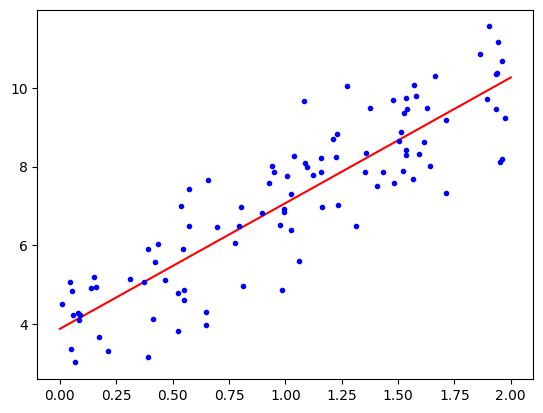

In [189]:
X_new = np.array([[0,1], [2,1]])
# use model equation
y_pred = X_new @ w_bgd

plt.figure() 
plt.plot(X_new[:,0], y_pred, "r-")
plt.plot(X,y, "b.")
plt.show()


# Stochastic Gradient Descent

In [190]:
alpha = 0.01     
epochs = 100    

w_sgd = rng.random((2,1))

for epoch in range(epochs): # training loop 
    for iter in range(n):
        random_index = rng.integers(0,n)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1] 
        # compute gradients
        gradients = 2 * xi.T @ (xi @ w_sgd - yi ) 
        # apply the rule
        w_sgd = w_sgd - alpha*gradients
w_sgd

array([[3.11520098],
       [3.68464738]])

# Mini-Batch Gradients Descent

In [191]:
alpha = 0.01     
epochs = 100    
B = 8 # batch size

w_mbgd = rng.random((2,1))

for epoch in range(epochs): # training loop 
    for iter in range(n//B+1):
        random_index = rng.integers(0,n-B)
        xi = X_b[random_index:random_index+B]
        yi = y[random_index:random_index+B] 
        # compute gradients
        gradients = 2 * xi.T @ (xi @ w_mbgd - yi ) 
        # apply the rule
        w_mbgd = w_mbgd - alpha*gradients
w_mbgd

array([[3.07764032],
       [4.11527304]])

# Logistic Regression via minimization of negative log likelihood using gradient descent

In [192]:
# %pip install datasets


In [193]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split


In [194]:
dataset = load_dataset("sms_spam")
dataset

DatasetDict({
    train: Dataset({
        features: ['sms', 'label'],
        num_rows: 5574
    })
})

In [195]:
dataset["train"]["sms"][0]


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n'

In [196]:
dataset["train"]["label"][0]

0

In [197]:
dataset["train"]["sms"][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"

In [198]:
dataset["train"]["label"][2]

1

In [199]:
sms1 = "large string"
sms2 = "second large string"
sms3 = "third very very large string"

|x | large | string | second | third |very| Type |
|--|-------|--------|--------|-------|----|------|
|sms1| 1   |   1    |   0    |   0   |  0 |  binary|
|sms2| 1   |   1    |   1    |   0   |  0 |  binary| 
|sms3| 1   |   1    |   0    |   1   |  1 |  binary|  
|sms3| 1   |   1    |   0    |   1   |  2 |  count|

In [200]:
X = dataset["train"].train_test_split(test_size=0.2) # 80/20 split 
# test set... unseen dataset 
X

DatasetDict({
    train: Dataset({
        features: ['sms', 'label'],
        num_rows: 4459
    })
    test: Dataset({
        features: ['sms', 'label'],
        num_rows: 1115
    })
})

In [201]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000, binary=True)
X_train = vectorizer.fit_transform([x["sms"] for x in X["train"]]).toarray()
X_test = vectorizer.transform([x["sms"] for x in X["test"]]).toarray() 
y_train = [x["label"] for x in X["train"]]
y_test = [x["label"] for x in X["test"]]
X_train[0] # first sms


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [202]:
vectorizer.get_feature_names_out()

array(['000', '03', '04', '08000839402', '08000930705', '10', '100',
       '1000', '10p', '11', '11mths', '12', '12hrs', '150', '150p',
       '150ppm', '16', '18', '1st', '20', '200', '2000', '2003', '250',
       '2day', '2lands', '2nd', '30', '50', '500', '5000', '750', '800',
       '8007', '86688', '87066', 'able', 'about', 'abt', 'ac', 'account',
       'actually', 'address', 'aft', 'after', 'afternoon', 'again',
       'against', 'age', 'ago', 'ah', 'aight', 'all', 'alone', 'already',
       'alright', 'also', 'always', 'am', 'amp', 'an', 'and', 'angry',
       'another', 'answer', 'any', 'anyone', 'anything', 'anytime',
       'anyway', 'apply', 'ard', 'are', 'area', 'around', 'as', 'ask',
       'askd', 'asked', 'asking', 'ass', 'at', 'attempt', 'auction',
       'available', 'ave', 'await', 'award', 'awarded', 'away', 'awesome',
       'b4', 'babe', 'baby', 'back', 'bad', 'balance', 'bank', 'bathe',
       'bcoz', 'be', 'beautiful', 'because', 'bed', 'bedroom', 'been',
     

In [203]:
import numpy as np

X_train_np = X_train.astype(np.float32)
X_test_np = X_test.astype(np.float32)
y_train_np = np.asarray(y_train, dtype=np.float32)
y_test_np = np.asarray(y_test, dtype=np.float32)

# Add bias term (intercept) for design matrices
X_train_b = np.hstack([np.ones((X_train_np.shape[0], 1), dtype=np.float32), X_train_np])
X_test_b = np.hstack([np.ones((X_test_np.shape[0], 1), dtype=np.float32), X_test_np])

In [204]:
w_mbgd = rng.normal(size=X_train_b.shape[1]).astype(np.float32)


In [205]:
def sigmoid(z): # it was our rho
    return 1/(1 + np.exp(-z))

def negative_log_likelihood(y,p):
    eps = 1e-8
    return (-1)*(y*np.log(p+eps) + (1-y)*np.log(1-p + eps))

rng = np.random.default_rng()

# TODO Train mbgd
alpha = 0.01     
epochs = 200
B = 8 # batch size

for epoch in range(epochs): # training loop 
    for iter in range(n):
        random_index = rng.integers(0,n-B)
        xi = X_train_b[random_index:random_index+B]
        yi = y_train_np[random_index:random_index+B] 
        # compute gradients
        logits = xi @ w_mbgd
        probs = sigmoid(logits)
        gradients = xi.T @ ( probs - yi ) 
        # apply the rule
        w_mbgd = w_mbgd - alpha*gradients
w_mbgd

# model 

z = w_mbgd.T @ X_test_b[0] # logit = number before sigmoid
prob = sigmoid(z) # probability 
dec = "SPAM" if prob > 0.5 else "NO SPAM" # decision


test_probs = sigmoid(X_test_b @ w_mbgd)
test_preds = (test_probs > 0.5).astype(np.int32)
acc = (test_preds == y_test_np).mean()
print(f"Test set accuracy: {acc*100:.2f}%")


Test set accuracy: 92.29%


In [206]:
def predict_spam(msg): # x is sms/text
    x = vectorizer.transform([msg]).toarray().astype(np.float32)
    x_b = np.hstack([np.ones((x.shape[0], 1), dtype=np.float32), x])
    prob = sigmoid(x_b @ w_mbgd)[0]
    return "SPAM" if prob > 0.5 else "NO SPAM" #decision 


print(predict_spam('Congratulations, you have won a prize!'))
print(predict_spam('Are we meeting at 7pm for dinner?'))

SPAM
NO SPAM


# Never do this (data leakage)

In [207]:
vectorizer = CountVectorizer(max_features=1000,binary=True)
X_f = vectorizer.fit_transform([x["sms"] for x in dataset["train"]]).toarray()
X_train_f, X_test_f = train_test_split(X_f)